In [2]:
# Importing Dependencies
import pandas as pd
import regex as re
import seaborn as sns

In [3]:
# Converting CSV files into Pandas dataframes
df_player = pd.read_csv('Resources/players.csv')
df_player_att = pd.read_csv('Resources/players_attributes.csv')
df_fifa_players = pd.read_csv('Resources/fifa_players.csv')

In [4]:
# Defining function to extract the last name from dataframes to have a common element for merging. 
def extract_last_name(name):
    # Use regex to find the last word in the string, which is assumed to be the last name
    last_name = re.search(r'(\w+)$', name)
    
    # Return the last name if a match is found
    if last_name:
        return last_name.group(1)
    else:
        return None

In [5]:
# This Df is a complete set with progressional growth over the years of each player. 
df_player_comp = pd.merge(df_player,df_player_att, how='left', on='player_api_id' ) 

# Getting distinct values based on latest date of recorded statistics of each player. 
df_player_comp['date'] = pd.to_datetime(df_player_comp['date'])
latest_indices = df_player_comp.groupby('player_name')['date'].idxmax()
latest_value = df_player_comp.loc[latest_indices]

latest_value['birthday'] = pd.to_datetime(latest_value['birthday'])
latest_value['birthday'] = latest_value['birthday'].dt.date

In [6]:
# Using function to extract last name using Regex. This way we have a common element in both datasets and can use that to merge. 
latest_value['last_name'] = latest_value['player_name'].apply(extract_last_name)

In [7]:
# Using function to extract last name using Regex. This way we have a common element in both datasets and can use that to merge. 
df_fifa_players['last_name'] = df_fifa_players['name'].apply(extract_last_name)

In [8]:
# Renaming Column for consistency
df_fifa_players.rename(columns= {'birth_date' : 'birthday'}, inplace=True)

In [9]:
# combining dataframes to cummalate all relevant columns 
df_combined = pd.merge(latest_value, df_fifa_players, how= 'inner', on='last_name')
df_combined.head()

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday_x,height,weight,id_y,player_fifa_api_id_y,date,...,long_shots_y,aggression_y,interceptions_y,positioning_y,vision_y,penalties_y,composure,marking_y,standing_tackle_y,sliding_tackle_y
0,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,6,189615,2016-04-21,...,62,73,75,60,68,59,71,72,78,79
1,5,23780,Aaron Hughes,17725,1979-11-08,182.88,154,88,17725,2015-12-24,...,30,70,65,41,35,38,49,68,70,64
2,5,23780,Aaron Hughes,17725,1979-11-08,182.88,154,88,17725,2015-12-24,...,27,69,62,45,38,45,56,64,63,61
3,5,23780,Aaron Hughes,17725,1979-11-08,182.88,154,88,17725,2015-12-24,...,26,66,63,29,41,45,70,65,65,63
4,5,23780,Aaron Hughes,17725,1979-11-08,182.88,154,88,17725,2015-12-24,...,37,63,64,23,46,41,63,66,65,62


In [10]:
# Dropped duplicate values from dataframe
df_combined.drop_duplicates(subset='player_name', inplace=True)


In [11]:
# Dropping Duplicate and irrelevant columns
df_combined.drop(columns=['player_fifa_api_id_x','weight', 'id_y', 'player_fifa_api_id_y','date','attacking_work_rate', 'defensive_work_rate','last_name', 'name',
       'full_name', 'birthday_y','height_cm','overall_rating_y', 'potential_y','preferred_foot_y',
       'international_reputation(1-5)', 'weak_foot(1-5)', 'skill_moves(1-5)',
       'body_type', 'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing_y',
       'finishing_y', 'heading_accuracy_y', 'short_passing_y', 'volleys_y',
       'dribbling_y', 'curve_y', 'freekick_accuracy', 'long_passing_y',
       'ball_control_y', 'acceleration_y', 'sprint_speed_y', 'agility_y',
       'reactions_y', 'balance_y', 'shot_power_y', 'jumping_y', 'stamina_y',
       'strength_y', 'long_shots_y', 'aggression_y', 'interceptions_y',
       'positioning_y', 'vision_y', 'penalties_y', 'composure', 'marking_y',
       'standing_tackle_y', 'sliding_tackle_y','gk_diving',
       'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes'], inplace=True)

In [13]:
# Removed Suffixes ('_x' and '_y') created by the merges 
df_combined.rename(columns=lambda x: x.replace('_x', '').replace('_y', ''), inplace=True)
df_combined.columns

Index(['id', 'player_api_id', 'player_name', 'birthday', 'height',
       'overall_rating', 'potential', 'preferred_foot', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'marking', 'standing_tackle', 'sliding_tackle', 'age', 'weight_kgs',
       'positions', 'nationality', 'value_euro', 'wage_euro'],
      dtype='object')

In [14]:
# Removed Null values within the dataframe.
df_cleaned = df_combined.dropna(subset=['wage_euro','value_euro','volleys','curve','agility','balance','jumping'])


In [15]:
# final check for null values
df_cleaned.isnull().sum()

id                    0
player_api_id         0
player_name           0
birthday              0
height                0
overall_rating        0
potential             0
preferred_foot        0
crossing              0
finishing             0
heading_accuracy      0
short_passing         0
volleys               0
dribbling             0
curve                 0
free_kick_accuracy    0
long_passing          0
ball_control          0
acceleration          0
sprint_speed          0
agility               0
reactions             0
balance               0
shot_power            0
jumping               0
stamina               0
strength              0
long_shots            0
aggression            0
interceptions         0
positioning           0
vision                0
penalties             0
marking               0
standing_tackle       0
sliding_tackle        0
age                   0
weight_kgs            0
positions             0
nationality           0
value_euro            0
wage_euro       

In [16]:
# Creating Dataframe with player info. 
df_player_info = df_cleaned[['id','player_name','birthday','age','height','weight_kgs',
       'overall_rating','potential','positions','nationality','value_euro','wage_euro']]

df_player_info

,id,player_name,birthday,age,height,weight_kgs,overall_rating,potential,positions,nationality,value_euro,wage_euro
0,2,Aaron Cresswell,1989-12-15,29,170.18,66.2,74.0,76.0,LB,England,6000000.0,63000.0
1,5,Aaron Hughes,1979-11-08,26,182.88,81.2,70.0,70.0,"LB,CB",Wales,875000.0,6000.0
6,6,Aaron Hunt,1986-09-04,28,182.88,71.2,77.0,77.0,"RB,RWB",England,875000.0,18000.0
11,8,Aaron Lennon,1987-04-16,31,165.10,63.0,77.0,77.0,"RM,LM",England,7000000.0,48000.0
15,10,Aaron Meijers,1987-10-28,31,175.26,77.1,69.0,69.0,LB,Netherlands,750000.0,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18806,11064,Zoltan Stieber,1988-10-16,30,175.26,67.1,73.0,74.0,"RM,LM",Hungary,2300000.0,6000.0
18807,11070,Zouhair Feddal,1989-01-01,29,190.50,83.0,75.0,76.0,CB,Morocco,10000000.0,27000.0
18808,11071,Zoumana Camara,1979-04-03,21,182.88,81.2,73.0,73.0,ST,Saudi Arabia,825000.0,3000.0
18819,2483,de Oliveira Cleber Monteiro,1980-05-23,25,182.88,82.1,62.0,62.0,CB,Portugal,425000.0,1000.0


In [17]:
# Converting Birthday Colum to datetime format. 
df_cleaned['birthday'] = df_cleaned['birthday'].astype('datetime64[ns]')

C:\Users\HP\AppData\Local\Temp\ipykernel_10048\2959105930.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['birthday'] = df_cleaned['birthday'].astype('datetime64[ns]')


In [18]:
# Filtering Dataframe to contain information of Defensive players
df_defensive = df_cleaned[df_cleaned['positions'].str.contains('LB|RB|CB|LWB|RWB')]

# Filtering Dataframe to keep columns relevant to Defenders
df_defensive = df_defensive[['id','aggression', 'interceptions', 
                             'positioning','marking','long_shots', 'standing_tackle','short_passing','long_passing', 'sliding_tackle']]
df_defensive.head()

,id,aggression,interceptions,positioning,marking,long_shots,standing_tackle,short_passing,long_passing,sliding_tackle
0,2,68.0,67.0,60.0,76.0,62.0,75.0,71.0,68.0,78.0
1,5,66.0,68.0,29.0,75.0,26.0,73.0,65.0,58.0,71.0
6,6,59.0,55.0,77.0,28.0,76.0,34.0,79.0,70.0,35.0
15,10,73.0,67.0,65.0,67.0,61.0,68.0,70.0,53.0,65.0
33,23,85.0,72.0,48.0,75.0,38.0,76.0,64.0,56.0,77.0


In [19]:
# Filter Dataframe to contain information of Attacking Players
df_attackers = df_cleaned[df_cleaned['positions'].str.contains('CM|CAM|RM|LM|ST|CF|\bLW\b|\bRW\b')]

# Filtering Dataframe to keep columns relevant to Attackers
df_attackers = df_attackers[['id','crossing','finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'free_kick_accuracy', 'long_passing',
       'ball_control','shot_power', 'long_shots']]
df_attackers.head()

,id,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,shot_power,long_shots
11,8,78.0,66.0,28.0,76.0,68.0,84.0,63.0,55.0,54.0,81.0,62.0,57.0
17,12,74.0,69.0,46.0,79.0,65.0,73.0,73.0,78.0,79.0,73.0,70.0,72.0
18,15,75.0,75.0,58.0,83.0,79.0,81.0,70.0,70.0,80.0,82.0,81.0,75.0
19,17,62.0,26.0,59.0,62.0,25.0,66.0,57.0,58.0,47.0,62.0,59.0,30.0
24,18,49.0,67.0,78.0,68.0,56.0,49.0,43.0,42.0,39.0,65.0,69.0,47.0


In [20]:
#Filtering Data to contain information of physical attributes
df_physical = df_cleaned[['id','reactions','balance','jumping', 'stamina', 'strength','aggression']]

df_physical.head()

,id,reactions,balance,jumping,stamina,strength,aggression
0,2,67.0,90.0,85.0,79.0,56.0,68.0
1,5,68.0,52.0,67.0,60.0,75.0,66.0
6,6,80.0,72.0,65.0,75.0,65.0,59.0
11,8,74.0,92.0,71.0,75.0,56.0,57.0
15,10,70.0,72.0,70.0,78.0,66.0,73.0


In [21]:
# Filter the DataFrame to contain data for goal keepers only
df_gk = df_cleaned[df_cleaned['positions'].str.contains('GK')]

# Filtering Dataframe to keep columns relevant to Goalkeepers
df_gk = df_gk[['id', 'agility','positioning', 'reactions', 'jumping', 'strength',
       'balance','stamina']]
df_gk.sample(10)

,id,agility,positioning,reactions,jumping,strength,balance,stamina
17629,10327,45.0,20.0,63.0,73.0,65.0,54.0,31.0
5726,3156,72.0,76.0,63.0,68.0,72.0,69.0,87.0
13498,7959,58.0,12.0,68.0,53.0,52.0,41.0,37.0
5063,2723,92.0,68.0,63.0,67.0,57.0,74.0,66.0
4850,2604,54.0,15.0,65.0,73.0,83.0,56.0,24.0
11027,6350,64.0,76.0,79.0,72.0,74.0,56.0,52.0
17241,10074,54.0,30.0,62.0,42.0,81.0,47.0,53.0
15167,8911,51.0,26.0,66.0,66.0,77.0,49.0,54.0
12395,7198,74.0,39.0,68.0,69.0,50.0,73.0,74.0
12585,7333,52.0,11.0,67.0,76.0,66.0,46.0,22.0


In [24]:
#exporting Dataframes to Csv
df_cleaned.to_csv('Resources/all_player_data.csv', index=False)
df_player_info.to_csv('Resources/player_info.csv', index=False)
df_gk.to_csv('Resources/goalkeeper_data.csv', index=False)
df_attackers.to_csv('Resources/attackers_data.csv', index=False)
df_defensive.to_csv('Resources/defensive_data.csv', index=False)
df_physical.to_csv('Resources/physical_data.csv', index=False)


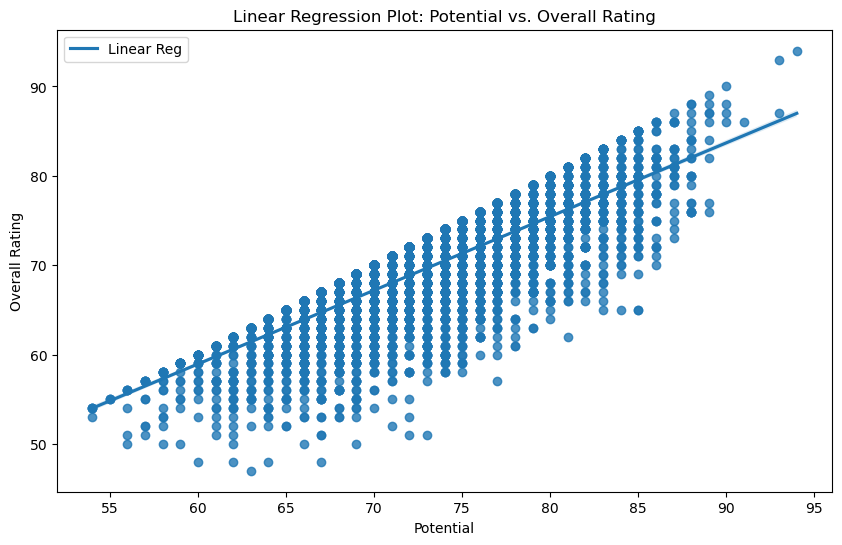

In [30]:
#  Linear Regression plot - Player's potential vs Overall Rating
# Load the CSV file into a DataFrame
all_player_data_df = pd.read_csv("Resources/all_player_data.csv")

# Create a linear regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='potential', y='overall_rating', data=all_player_data_df, line_kws={'label':"Linear Reg"})

# Add labels and legend
plt.xlabel('Potential')
plt.ylabel('Overall Rating')
plt.title('Linear Regression Plot: Potential vs. Overall Rating')
plt.legend()

# Show the plot
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_10048\288557071.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='age', y='overall_rating', data=all_player_data_df, ci=None)


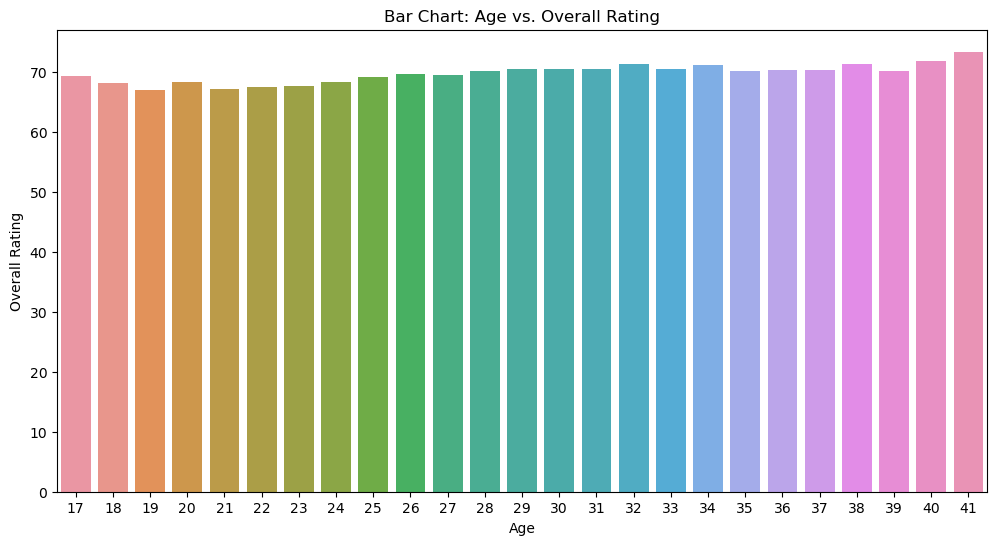

In [32]:
#bar chart - overall rating and age 

# Load the CSV file into a DataFrame
all_player_data_df = pd.read_csv("Resources/all_player_data.csv")

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='overall_rating', data=all_player_data_df, ci=None)

# Add labels and title
plt.xlabel('Age')
plt.ylabel('Overall Rating')
plt.title('Bar Chart: Age vs. Overall Rating')

# Show the plot
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_10048\2346286753.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='wage_category', y='overall_rating', data=all_player_data_df, ci=None)
c:\Users\HP\anaconda3\envs\dev\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


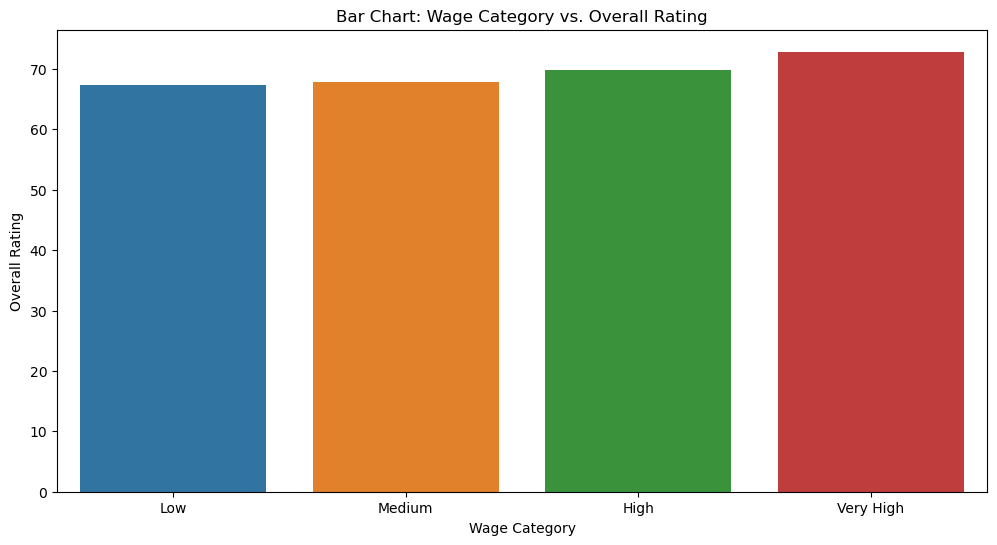

In [34]:
#bar chart - overall rating vs wages

# Load the CSV file into a DataFrame
all_player_data_df = pd.read_csv("Resources/all_player_data.csv")

# Create bins for wage to categorize continuous wage values
bin_labels = ['Low', 'Medium', 'High', 'Very High']
all_player_data_df['wage_category'] = pd.qcut(all_player_data_df['wage_euro'], q=4, labels=bin_labels)  # Quantile-based binning

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='wage_category', y='overall_rating', data=all_player_data_df, ci=None)

# Add labels and title
plt.xlabel('Wage Category')
plt.ylabel('Overall Rating')
plt.title('Bar Chart: Wage Category vs. Overall Rating')

# Show the plot
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_10048\3983250304.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='value_category', y='overall_rating', data=all_player_data_df, ci=None)
c:\Users\HP\anaconda3\envs\dev\lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


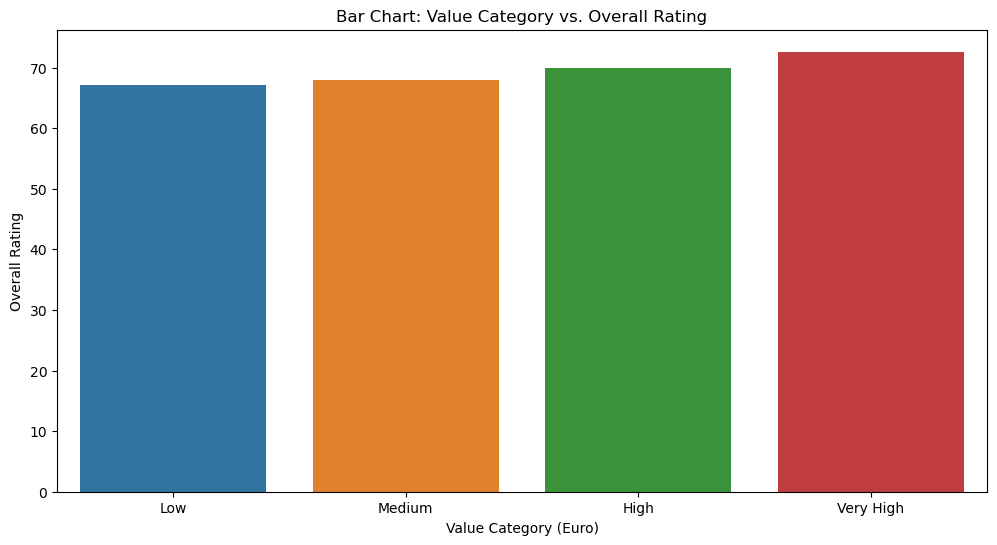

In [35]:
#bar chart - overall rating vs value_euro

# Load the CSV file into a DataFrame
all_player_data_df = pd.read_csv("Resources/all_player_data.csv")

# Create bins for value to categorize continuous value_euro values
bin_labels = ['Low', 'Medium', 'High', 'Very High']
all_player_data_df['value_category'] = pd.qcut(all_player_data_df['value_euro'], q=4, labels=bin_labels)  # Quantile-based binning

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='value_category', y='overall_rating', data=all_player_data_df, ci=None)

# Add labels and title
plt.xlabel('Value Category (Euro)')
plt.ylabel('Overall Rating')
plt.title('Bar Chart: Value Category vs. Overall Rating')

# Show the plot
plt.show()


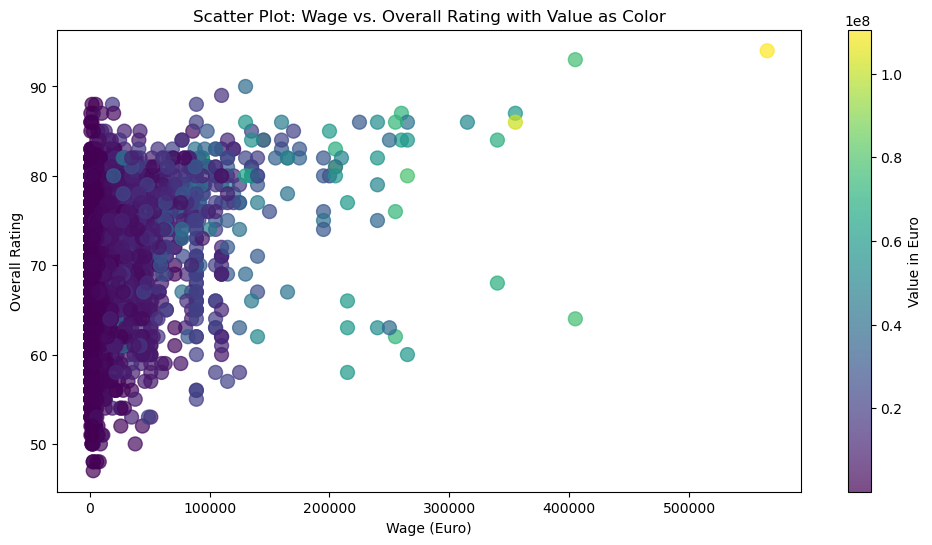

In [37]:
#Scatter Plot: Wage vs. Overall Rating with Value as Color

# Load the CSV file into a DataFrame
all_player_data_df = pd.read_csv("Resources/all_player_data.csv")

# Create a scatter plot with value_euro as the size of the points
plt.figure(figsize=(12, 6))
scatter = plt.scatter(x=all_player_data_df['wage_euro'], y=all_player_data_df['overall_rating'], 
                      c=all_player_data_df['value_euro'], cmap='viridis', 
                      s=100, alpha=0.7)  # s controls the size of points

# Add color bar (legend) for value_euro
cbar = plt.colorbar(scatter)
cbar.set_label('Value in Euro')

# Add labels and title
plt.xlabel('Wage (Euro)')
plt.ylabel('Overall Rating')
plt.title('Scatter Plot: Wage vs. Overall Rating with Value as Color')

# Show the plot
plt.show()


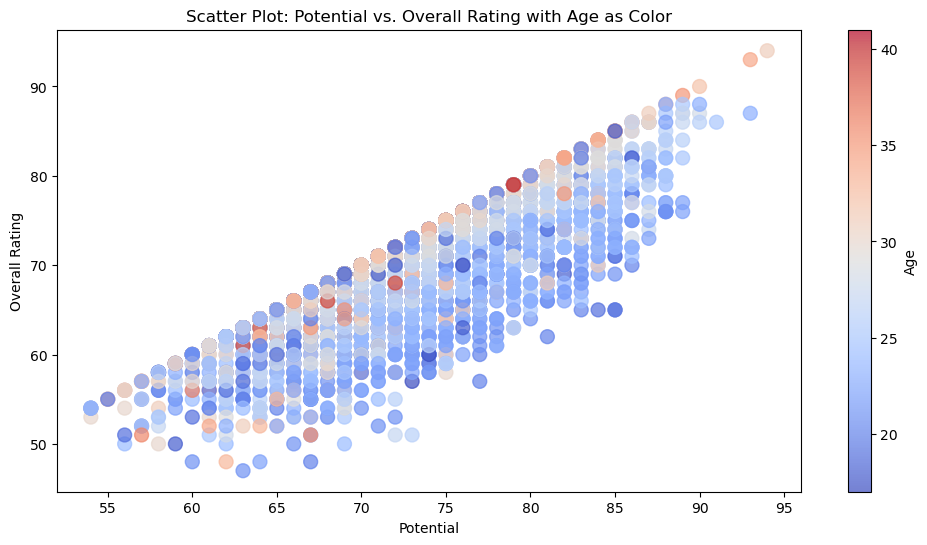

In [39]:
#Scatter Plot: Potential vs. Overall Rating with Age as Color

# Load the CSV file into a DataFrame
all_player_data_df = pd.read_csv("Resources/all_player_data.csv")

# Create a scatter plot with age as the size of the points
plt.figure(figsize=(12, 6))
scatter = plt.scatter(x=all_player_data_df['potential'], y=all_player_data_df['overall_rating'], 
                      c=all_player_data_df['age'], cmap='coolwarm', 
                      s=100, alpha=0.7)  # s controls the size of points

# Add color bar (legend) for age
cbar = plt.colorbar(scatter)
cbar.set_label('Age')

# Add labels and title
plt.xlabel('Potential')
plt.ylabel('Overall Rating')
plt.title('Scatter Plot: Potential vs. Overall Rating with Age as Color')

# Show the plot
plt.show()
